# Vorhersage von Um- und Absatz

## Einleitung

Die Vorhersage von Umsatz und Absatz mit Künstlicher Intelligenz (KI) bezieht sich auf den Einsatz von Machine Learning-Algorithmen und KI-Modellen, um zukünftige Verkaufszahlen oder Umsätze eines Unternehmens basierend auf historischen Daten vorherzusagen. KI kann dabei wesentlich präzisere Vorhersagen treffen als traditionelle Methoden, da sie komplexe Muster und Trends in großen Datensätzen automatisch erkennt und nutzt.

## Wie funktioniert die Umsatz- und Absatzvorhersage mit KI?

Die KI-basierte Vorhersage von Um- und Absatz basiert auf der Analyse von Zeitreihendaten – also Daten, die in chronologischer Reihenfolge gesammelt wurden (z.B. tägliche, wöchentliche oder monatliche Verkaufszahlen). KI-Modelle lernen Muster aus diesen historischen Daten, wie z.B. saisonale Schwankungen, Wachstums- oder Rückgangstrends und kurzfristige Spitzen, um präzise Prognosen für zukünftige Zeiträume zu erstellen.

KI-Systeme beziehen viele Indikatoren mit ein:

    -Wirtschaftliche Indikatoren (z.B. Arbeitslosenquote, Zinssätze)
    
    -Wetterdaten (z.B. für den Einzelhandel oder Tourismus)
    
    -Social-Media-Trends oder Kundenbewertungen

## KI-Methoden zur Umsatz- und Absatzprognose

### Zeitreihenmodelle mit Machine Learning

LSTMs (Long Short-Term Memory) sind spezialisierte neuronale Netzwerke für Zeitreihendaten, welche gut darin sind, Abhängigkeiten über längere Zeiträume zu erkennen. LSTMs können besonders saisonale Schwankungen oder plötzliche Veränderungen im Umsatzverhalten erfassen.

Beispiel: Ein LSTM-Modell kann lernen, dass der Umsatz eines Einzelhändlers während der Weihnachtszeit immer steigt, und entsprechend zukünftige Spitzen vorhersagen.

### Clustering-Algorithmen

KI kann verwendet werden, um Kundengruppen oder Produkte auf Basis ähnlicher Kaufmuster zu segmentieren. Diese Segmentierung kann dann verwendet werden, um spezifische Prognosen für verschiedene Gruppen zu erstellen.

Beispiel: Clustering-Methoden könnten Kunden identifizieren, die tendenziell in großen Mengen kaufen, und auf dieser Basis eine genauere Vorhersage für diese Gruppe machen.

### Deep Learning

Algorithmen, wie Random Forests oder Gradient Boosting Machines (GBMs), können mehrere Faktoren (z.B. Preis, Kundenverhalten, wirtschaftliche Bedingungen) gleichzeitig analysieren und präzise Vorhersagen treffen. Sie sind in der Lage, nicht-lineare Zusammenhänge zwischen den Variablen zu erkennen.

Beispiel: Ein Random-Forest-Modell könnte vorhersagen, wie sich eine Marketingkampagne in verschiedenen Regionen auf den Absatz auswirken wird.

## Beispiele für KI-Anwendungen in der Umsatz- und Absatzprognose

### Einzelhandel und E-Commerce

Online-Händler wie Amazon setzen KI ein, um zukünftige Produktverkäufe auf Basis historischer Verkaufsdaten, saisonaler Trends und Kundenverhalten vorherzusagen. Diese Vorhersagen helfen bei der Bestandsplanung und der Optimierung von Marketingkampagnen.

### Finanzdienstleistungen

Banken und Versicherungen nutzen KI, um zukünftige Einnahmen zu prognostizieren, basierend auf Kundenverhalten, wirtschaftlichen Indikatoren und vergangenen Transaktionen. Solche Vorhersagen helfen, Finanzstrategien zu planen und Risiken zu minimieren.

### Supply-Chain-Management

Um zukünftige Absatzmengen vorherzusagen, kann KI genutzt werden, um ihre Lieferkette zu optimieren. Dies hilft, Überbestände oder Lieferengpässe zu vermeiden, da die KI die Nachfrage genau vorhersagen kann.

## Code zur Veranschaulichung

Nun werden wir uns , zur Veranschaulichung, ein Codebeispiel ansehen. Dieses Beispiel ist kein komplexes, nur eines um zu veranschaulichen wie KI arbeitet. Die einzigen Daten die der KI, zum Training gegeben werden sind Tage und die Umsatzzahlen dazu, also keine speziellen Tageszeiten, Wetterdaten etc.. Zunächst müssen die Bibliotheken: Torch, SciKit-Learn, NumPy und SciPy installiert werden. Wobei NumPy in der Version 1.24.4 installiert werden muss, da es sonst Kompatiilitätsprobleme gibt.

In [4]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install numpy==1.24.4

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


Epoch 0 loss: 0.2715767025947571
Epoch 10 loss: 0.09910979121923447
Epoch 20 loss: 0.08884269744157791
Epoch 30 loss: 0.07996932417154312
Epoch 40 loss: 0.07243265211582184
Epoch 50 loss: 0.06643514335155487
Epoch 60 loss: 0.061976607888936996
Epoch 70 loss: 0.05881951004266739
Epoch 80 loss: 0.05664537847042084
Epoch 90 loss: 0.05516979098320007
y-pred:  torch.Size([1])
Y-train:  torch.Size([1])


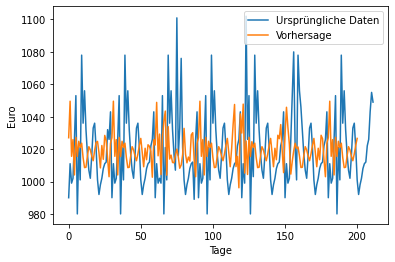

In [2]:
import torch 
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Daten laden und vorbereiten
# bsp-Daten
data = pd.read_csv('BspUmsatzDaten.csv') #Zeitreihendaten: Spalten (Datum, Umsatz)
sales = data['Umsatz'].values

# Daten zwischen 0 & 1 skalieren
scaler = MinMaxScaler(feature_range=(0, 1))
sales_scaled = scaler.fit_transform(sales.reshape(-1, 1))

# Daten in In- & Output-Paare verwandeln

def create_dataset(data, time_step = 1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10 
X, Y = create_dataset(sales_scaled, time_step)

# Daten zu [samples, time steps, features] umformen
X = X.reshape(X.shape[0], X.shape[1], 1)

# in Torch Tensors umwandeln
X_train = torch.from_numpy(X).type(torch.Tensor)
Y_train = torch.from_numpy(Y).type(torch.Tensor)

# LSTM-Modell definieren
class LSTMModel(nn.Module):
    def __init__(self, input_size=10,  hidden_layer_size=50, output_size=1):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1, 1, self.hidden_layer_size),
                            torch.zeros(1, 1, self.hidden_layer_size))
        
    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]
    
# Modell instanziieren, Verlustfunktion und Optimierer
model = LSTMModel()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Modelltraining
epochs = 100
for epoch in range(epochs):
    for i in range(len(X_train)):
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                             torch.zeros(1, 1, model.hidden_layer_size))
        
        y_pred = model(X_train[i].view(1, 1, -1))
        y_true = Y_train[i].unsqueeze(0)
        
        single_loss = loss_function(y_pred, y_true)
        optimizer.zero_grad()
        single_loss.backward()
        optimizer.step()
        
    if epoch % 10 == 0:
        print(f'Epoch {epoch} loss: {single_loss.item()}')
        
# Vorhersage und Visuallisierung
model.eval()

# erstellen der trainingsdaten für Vorhersagen
train_predict = []
model.eval()
with torch.no_grad():
    for i in range(len(X_train)):
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size), torch.zeros(1, 1, model.hidden_layer_size))
        y_pred = model(X_train[i].view(1, 1, -1))
        
        train_predict.append(y_pred.item())
        
train_predict = np.array(train_predict).reshape(-1, 1)
train_predict = scaler.inverse_transform(train_predict)

# Originaldaten zurückskalieren
sales_actual = scaler.inverse_transform(sales_scaled)

# Überprüfung Demensionen
print("y-pred: ", y_pred.shape)
print("Y-train: ", y_true.shape)

# Plot
plt.plot(sales_actual, label='Ursprüngliche Daten')
plt.plot(train_predict, label='Vorhersage')
plt.xlabel('Tage')
plt.ylabel('Euro')
plt.legend()
plt.show()

Zunächst müssen die Bsp-Daten geladen werden, diese Daten können in der 'BspUmsatzDaten.csv' eingesehen werden. Jene Daten müssen zudem skalliert, in Paare verwandelt und in Torch Tensoren umgewandelt werden. Wenn das erledigt ist wird das LSTM-Modell definiert, in diesem Fall mit 10 Lagen, zu jeweils 50 Neuronen. Beim Trainieren der KI wird ein Loss-Wert, zu jeder Lage bestimmt, wobei versucht wird diesen Wert so gering wie möglich zu halten. Nachdem Modeltraining wird die Vorhersage, sowie die Visualisierung, realisiert. Zum Schluss werden die Originaldaten zurückskalliert und in desem Fall eine Grafik erstellt, welche die ursprünglihen Daten sowie die Vorhersage der KI beinhaltet.

## Fazit

Die KI-basierte Umsatz- und Absatzprognose ermöglicht es Unternehmen, präzise und dynamische Vorhersagen zu treffen, indem sie historische Daten und externe Faktoren analysiert. Durch den Einsatz von Machine-Learning-Algorithmen wie LSTMs, Random Forests oder Prophet können Unternehmen ihre Verkaufsstrategien optimieren, die Lieferkette anpassen und sich auf zukünftige Nachfrageveränderungen vorbereiten. KI bietet einen klaren Vorteil gegenüber traditionellen Prognosemethoden, da sie komplexe Muster in den Daten erkennt und sich an neue Trends anpasst.

[1] https://digitalzentrum-hannover.de/aktuelles/ki-basierte-absatzplanung/ <br>
[2] https://trendskout.com/de/allgemein/die-4-methoden-der-absatzprognose-mit-ki/